# **Modelagem Matemática e Computacional - Aula prática 4**
### Nome: Riquelme Freitas Gomes
### Data: 04/09/2023
<br>

# **Objetivo:**
> ### Resolver vários problemas utilizando o conteúdo das últimas aulas teóricas e praticar os conceitos de modelagem que vimos.

* #### Escolher um bom modelo em um processo de modelagem é fundamental para o sucesso de qualquer projeto de análise de dados, aprendizado de máquina ou previsão. A escolha adequada do modelo desempenha um papel crucial em garantir que os resultados sejam precisos, confiáveis e relevantes para os objetivos do projeto. Com isso, a escolha de um bom modelo em uma modelagem é uma etapa crítica que requer uma compreensão profunda dos dados, dos objetivos do projeto e das características de diferentes algoritmos. Investir tempo na seleção adequada do modelo pode economizar esforço e recursos no longo prazo, além de garantir resultados mais confiáveis e relevantes para a tomada de decisões.

# **Problema 1**

> #### Qual deve ser o ganho anual se alguém quiser dobrar seu dinheiro em sete anos?

Nesse caso, estamos considerando o tempo (medido em anos), o ganho anual e uma quantidade de dinheiro.

$t=7$ : tempo (anos)

$k$ : ganho anual

$N(0) = N_0$ : quantidade de dinheiro inicial

$N(t)$ : quantidade de dinheiro no tempo $t$

<br>

Queremos descobrir o ganho anual $(k)$ para dobrar o dinheiro $(2N_0)$ em sete anos $(t=7)$. Como a questão não explicita qual modelo deve ser utilizado, podemos tentar alguns e ver qual melhor se encaixa na resolução. Veremos as soluções supondo um crescimento linear e exponencial.




#### **Modelo linear:** $N(t)=k*t+N_0$



Queremos descobrir o valor de $k$ para dobrar o dinheiro em 7 anos. Logo,

$N(7)=2N_0$

$7*k+N_0=2N_0$

$7*k=N_0$

$k=N_0/7$

<br>

Vemos, dessa forma, que nossa solução considerando o modelo linear depende da quantidade de dinheiro inicial. Abaixo está uma função em python que recebe o tempo $t$ e a quantidade de dinheiro inicial $N_0$, e calcula o valor de $k$ que queremos para dobrar o dinheiro, vamos testá-la com quantidade 100 de dinheiro inicial. A outra função simula os resultados $N(t)$ do modelo linear, vamos usá-la para checar se a quantidade de dinheiro dobrou para o $k$ encontrado.

In [ ]:
def valor_k(t, N0):
  return N0 / t   # valor de k

def modelo_linear(k, t, N0):
  return k*t + N0

In [ ]:
t, N0 = 7, 100
k = valor_k(t, N0)
print(k)

modelo_linear(k, t, N0) == 2*N0

14.285714285714286


True

Como o retorno da função foi "True", é verdade que a quantidade de dinheiro inicial dobrou para o $k$ encontrado na função anterior. Agora vamos utilizar um modelo exponencial.

#### **Modelo exponencial:** $N(t)=N_0*e^{kt}$


In [ ]:
import numpy as np

def modelo_exponencial(k, t, N0):
  return N0 * np.power(np.exp(1), k*t)

$N(7)=2N_0$

$N_0*e^{7k}=2N_0$

$e^{7k}=2$

$ln$ $e^{7k}=$ $ln$ $2$

$7*k=$ $ln$ $2$

$k=$ $ln$ $2$ $/$ $7 ≈ 0.09902...$   

<br>

Nesse caso, o valor de $k$ não se mostrou dependente de $N_0$. Portanto, esse modelo aparenta ser melhor para encontrar o valor que queríamos no problema. Vamos checar novamente se a quantidade de dinheiro inicial dobrou para o valor de $k$ encontrado.

In [ ]:
k = np.log(2) / 7

modelo_exponencial(k, t=7, N0=100)

199.99999999999997

É possível notar que a quantidade de dinheiro nesse tempo é, aproximadamente, o dobro da quantidade inicial.

# **Problema 2**

> #### Em uma pesquisa de dinâmica populacional de besouros, você estima que o tamanho da população seja de $3.000$. Ao longo do mês, você registra $400$ nascimentos e $150$ profundidades. Estime $k$ e calcule a previsão da dinâmica populacional em $6$ meses.

Nesse caso, estamos considerando o tempo (medido em meses), a taxa de crescimento e o tamanho da população.

$t=6$ : tempo (meses)

$k$ : taxa de crescimento

$N(0) = N_0 = 3000$ : tamanho inicial da população de besouros

$N(t)$ : tamanho da população de besouros no tempo $t$

<br>

Pelas informações dadas e como não foi especificado sobre a modelagem no enunciado, o problema aparenta poder ser modelado de forma simples com o modelo linear: $N(t)=k*t+N_0$

onde $k$ pode ser estimado como o número de nascimentos $(b)$ menos o número de mortes $(d)$. Logo, estimando $k$:

$k = b - d$

$k = 400 - 150 = 250$



A partir desse valor de $k$, para calcular a previsão da dinâmica populacional em $6$ meses, podemos utilizar a função "modelo_linear" feita no problema $1$.

In [ ]:
modelo_linear(k=250, t=6, N0=3000)

4500

Portanto, de acordo com essa previsão do modelo linear, em $6$
meses, o tamanho da população será de $4500$ besouros. Agora vamos estimar o $k$ de outra forma com o uso do modelo exponencial.

* $N(t)=k*t+N_0$

onde $k$ pode ser estimado como o número de nascimentos $(b)$ menos o número de mortes $(d)$ dividido pelo tamanho inicial da população $(N_0)$.
Logo, estimando $k$:

$k = b - d$ $/$ $N_0$

$k = 400 - 150$ $/$ $3000$

$k ≈ 0,083333...$

<br>

Assim, vamos usar esse novo valor de $k$ para prever a dinâmica populacional em $6$ meses.

In [ ]:
k = (400 - 150) / 3000
modelo_exponencial(k, t=6, N0=3000)

4946.163812100384

Teremos aproximadamente $4946$ besouros em 6 meses, o que é uma quantidade maior do que a prevista com o modelo linear. Isso faz sentido uma vez que, em um crescimento exponencial de taxa positiva, a quantidade tende a crescer de forma mais rápida com o passar do tempo quando em comparação ao crescimento linear.

# **Problema 3**

> #### Fazer um programa em python com determinadas características.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Programa conforme solicitado no problema 3
def programa(k, P0, N, delta_t, epsilon, func):

  # vetor t = 0 : delta_t : N
  t = np.arange(0, N + delta_t, delta_t)

  # vetor aleatório normalmente distribuído com média zero e desvio padrão ε
  eta = np.random.normal(loc=0, scale=epsilon, size=len(t))

  P = P0 * np.exp(k*t) + eta

  # Calcular o vetor DeltaP / Deltat
  delta_P = np.gradient(P, delta_t)

  # Calcular o parâmetro kk por ajuste
  popt, pcov = curve_fit(func, t[:-1], delta_P[:-1]/P[:-1])
  kk = popt[0]

  # Retorna os valores calculados
  return t, P, delta_P, kk

$"eta"$ e a adição de aleatoriedade
> Adicionar uma variável aleatória a uma função é uma técnica comumente utilizada na modelagem e simulação de eventos aleatórios na realidade. Isso ocorre acima com a varíavel "$eta$" e permite que os modelos matemáticos e computacionais capturem a incerteza e a variabilidade inerentes a muitos fenômenos do mundo real. Isso torna os modelos mais realistas e úteis para uma ampla gama de aplicações, adicionando aleatoriedade ao problema e ajudando-nos a entender melhor e tomar decisões informadas em face da complexidade e incerteza dos fenômenos realidade.


Abaixo determinei algumas funções que podem ser utilizadas para serem ajustadas com o programa anterior e assim visualizar seu funcionamento. Da mesma forma, defini algumas entradas de teste possíveis para que possamos ainda trocar as condições iniciais mais facilmente. Os valores utilizados nessas entradas foram retirados dos arquivos de códigos disponibilizados no Google Classroom.

In [ ]:
# Definição das funções a serem ajustadas
def func1(t, k):
    return t*k

def func2(t, k, P0=100):
    return P0*np.exp(t*k)

def func3(t, k, epsilon=0.1):
    return t*k + np.random.normal(scale=epsilon, size=len(t))

# Determina entradas para teste [k, P0, N, delta_t]
entrada1 = [0.5, 10, 100, 0.1]
entrada2 = [0.001, 1, 1000, 0.01]
entrada3 = [0.001, 1, 1000, 0.1]

#### Compare o resultado obtido com $k$, determine o erro entre $kk$ e $k$ à medida que o $ε$ aumenta

Para determinar o erro entre $kk$ e $k$ criei a função "calcula_erro" que utiliza a função "programa" e calcula esse erro conforme cada valor de epsilon.

In [ ]:
# Calcular o erro entre kk e k para cada valor de epsilon
def calcula_erro(k, P0, N, delta_t, epsilons, func):
  erros = []

  for ep in epsilons:
    t, P, delta_P, kk = programa(k, P0, N, delta_t, ep, func)
    erro = abs(kk - k)
    erros.append(erro)

  # Retorna lista com os erros encontrados
  return erros, t, P, delta_P, kk

Com isso, vamos observar os erros entre $kk$ e $k$ utilizando a $entrada1$ e a $func1$ definidas anteriormente.

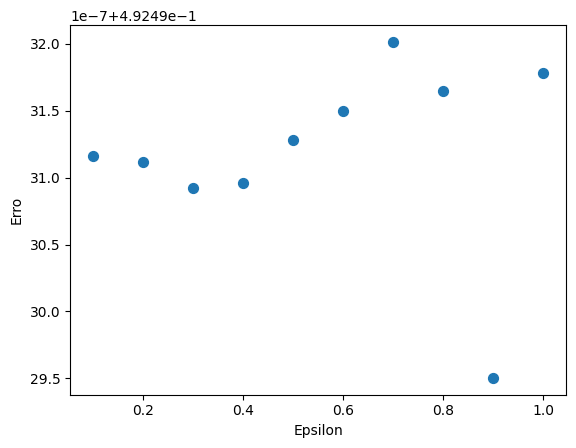

In [ ]:
k, P0, N, delta_t = entrada1
func = func1
epsilons = np.linspace(0.1, 1, 10) # 10 valores de epsilon utilizados
erros, t, P, delta_P, kk = calcula_erro(k, P0, N, delta_t, epsilons, func)

# Mostra os erros obtidos
import pandas as pd

data = {'Epsilon':epsilons, 'Erro':erros}
df = pd.DataFrame(data = data);
df.plot.scatter(x = 'Epsilon', y = 'Erro', s = 50);

#for i in range(10):
#  print(f"Para ε = {epsilons[i]}:\nERRO: {erros[i]}\n")

Muito provavelmente por conta da variável aleatória mencionada, os erros encontrados variam muito entre cada execução. No entanto, de forma geral é possível observar que leves aumentos no valor do erro a medida que epsilon aumenta, como faz-se perceptível pelo gráfico acima.

#### Determine a população para $t = 2 ∗ N$ com $k$ e $kk$ dados e determinados.

Para determinar a população para $t = 2 ∗ N$, utilizamos o $k$ e $kk$ obtidos anteriormente, calculamos a população para esses valores e plotamos o resultado abaixo.

k: 0.5				população_k: 2.6881171418161355e+44
kk: 0.007506822236964191	população_kk: 44.878082730213215



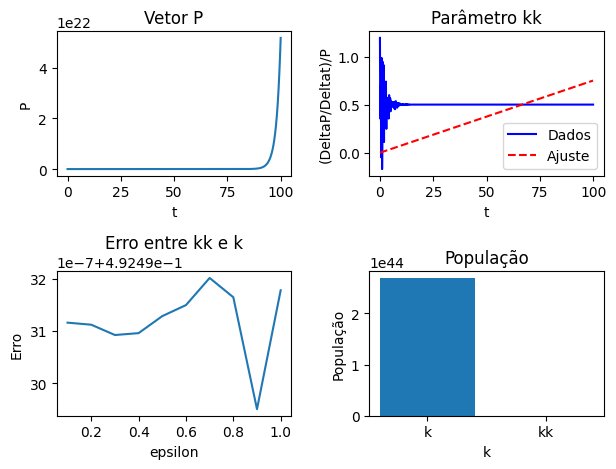

In [ ]:
# Calcular a população para t = 2*N com k e kk dados
populacao_k = P0 * np.exp(k*2*N)
populacao_kk = P0 * np.exp(kk*2*N)

print(f"k: {k}\t\t\t\tpopulação_k: {populacao_k}\nkk: {kk}\tpopulação_kk: {populacao_kk}\n")

# Plotar os resultados
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(t, P)
axs[0, 0].set_title('Vetor P')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('P')

axs[0, 1].plot(t[:-1], delta_P[:-1]/P[:-1], 'b-', label='Dados')
axs[0, 1].plot(t[:-1], func(t[:-1], kk), 'r--', label='Ajuste')
axs[0, 1].set_title('Parâmetro kk')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('(DeltaP/Deltat)/P')
axs[0, 1].legend()

axs[1, 0].plot(epsilons, erros)
axs[1, 0].set_title('Erro entre kk e k')
axs[1, 0].set_xlabel('epsilon')
axs[1, 0].set_ylabel('Erro')

axs[1, 1].bar(['k', 'kk'], [populacao_k, populacao_kk])
axs[1, 1].set_title('População')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('População')

plt.tight_layout()
plt.show()

Observamos que o valor de $kk$ encontrado mostra-se bem menor em comparação ao valor de $k$. Por consequência, pelo último gráfico, vemos que a população considerando $k$ é significativamente maior que a população com $kk$ para $t = 2 ∗ N$. Acima dos gráficos printei esses valores numéricos para efeito de comparação.

# **Problema 4**

> #### Uma amostra de algas marinhas unicelulares forneceu uma estimativa de $100.000$ celulas nos dados iniciais. Dez dias depois, o tamanho da população foi estimado em $500.000$ células. Calcule a taxa de crescimento assumindo crescimento exponencial.

Como explicitado na questão, para esse problema devemos assumir um crescimento exponencial, onde temos o tempo (medido em dias), uma quantidade de células inicial e o tamanho da população no tempo $t$.

$t=10$ : tempo (dias)

$k$ : taxa de crescimento da população

$N(0)$ = $N_0$ = $100.000$ : quantidade de células nos dados iniciais

$N(t)$ : quantidade de células no tempo $t$

$N(10) = 500.000$

<br>

Para calcular a taxa de crescimento em um modelo exponencial, podemos usar a fórmula que relaciona o tamanho da população inicial ($N_0$), o tamanho da população final $N(t)$, o tempo ($t$) e a taxa de crescimento ($k$):

* $N(t)=N_0*e^{kt}$

Agora, usamos os dados fornecidos no problema para calcular a taxa de crescimento.

$N(10) = N_0*e^{10k}$

$500.000 = 100.000*e^{10k}$

$e^{10k} = 5$

$ln$ $e^{10k} =$ $ln$ $5$

$10*k =$ $ln$ $5$

$k =$ $ln$ $5$ $/$ $10$

$k ≈ 0.16094...$

In [ ]:
k = np.log(5) / 10  # valor de k aproximado
modelo_exponencial(k, t=10, N0=100000)

499999.9999999998

Usamos a nossa função que simula o modelo exponencial a fim de conferir o resultado e se após 10 dias o tamanho da população é mesmo de $500.000$. Como mostrado, o valor encontrado é muito próximo ao que queríamos, apesar de não ser exato uma vez que o $k$ está aproximado. Além disso, essa taxa de crescimento aparenta estar correta, já que $k$ é um valor positivo e, portanto, deve gerar um crescimento na população.

# **Problema 5**

> #### Os glóbulos vermelhos são produzidos na medula óssea a uma taxa de $m$ células por dia. Eles têm uma taxa de mortalidade dependente da densidade de $d$ por dia. Formule um modelo matemático adequado para este processo e discuta a solução.

Para formular um modelo matemático para o processo de produção e morte de glóbulos vermelhos na medula óssea, podemos usar uma equação diferencial que descreva a mudança na densidade de glóbulos vermelhos $(N)$ ao longo do tempo $(t)$. Como nada no problema indica que seja um crescimento exponencial, podemos assumir um modelo de crescimento linear.

<br>

Vamos considerar o seguinte:

* A taxa de produção de glóbulos vermelhos é de $m$ células por dia.
* A taxa de mortalidade dos glóbulos vermelhos é diretamente proporcional à sua densidade $(d)$.


Podemos escrever a equação diferencial da seguinte forma:

$dN$ $/$ $dt =$ Taxa de Produção - Taxa de Mortalidade

<br>

A taxa de produção é constante e igual a $m$. A taxa de mortalidade depende da densidade $(d)$ e pode ser modelada como $α⋅d$, onde $α$ é uma constante de mortalidade. Assumimos que a taxa de mortalidade é proporcional à densidade de glóbulos vermelhos.

A equação diferencial agora se torna:

$dN$ $/$ $dt = m - α ⋅ d$

Esta é uma equação diferencial de primeira ordem que descreve como a densidade de glóbulos vermelhos está mudando com o tempo.

<br>

Para discutir a solução dessa equação, precisaríamos especificar as condições iniciais, ou seja, o valor inicial de $N$ em $t=0$ (denotado como $N_0$). A solução geral da equação diferencial seria uma função que descreve como a densidade de glóbulos vermelhos evolui ao longo do tempo, considerando a taxa de produção e a taxa de mortalidade. Se as condições iniciais fossem fornecidas, poderíamos resolver a equação diferencial para obter uma expressão específica para $N(t)$, que descreveria a densidade de glóbulos vermelhos em função do tempo. Essa solução nos permitiria estudar como a população de glóbulos vermelhos se comporta ao longo do tempo, levando em consideração os processos de produção e mortalidade.

# **Problema 6**

> #### Toda vez que você escova os dentes, as bactérias entram na circulação sanguínea. Como este é um ambiente nutritivo para eles, eles imediatamente começam a crescer exponencialmente. Felizmente, temos neutrófilos em nosso sangue que prontamente matam as bactérias ao encontrá-las. Um modelo simples seria
$DB / dt = rB - kNB$ <br>
onde $B$ e $N$ são o número de bactérias e neutrófilos por $ml$ de
sangue, $r$ é a taxa bruta de bactérias (por hora) e $k$ e a taxa na
qual as bactérias são mortas por neutrófilos. Qual é o tempo
de duplicação das bactérias na ausência de neutrófilos. Depois
assume que tem neutrófilos e calcule o número de batérias para um tempo dado $T$.

Para determinar o tempo de duplicação das bactérias na **ausência de neutrófilos**, precisamos considerar a equação diferencial que descreve o crescimento das bactérias na ausência de qualquer ação dos neutrófilos, isto é, para $N = 0$. A equação diferencial dada torna-se:
$DB / dt = rB$

onde
* $B$ é o número de bactérias por ml de sangue.
* $r$ é a taxa bruta de crescimento de bactérias (por hora).

Essa é uma equação diferencial de crescimento exponencial, e sua solução geral é da forma:
$B(t)=B_0*e^{rt}$

Com $B_0$ sendo o número inicial de bactérias.

<br>

Para encontrar o tempo de duplicação das bactérias podemos usar a fórmula geral:

$B(t)=2B_0$

$B_0*e^{rt}=2B_0$

$e^{rt}=2$

$ln$ $e^{rt}=$ $ln$ $2$

$r*t=$ $ln$ $2$

$t =$ $ln$ $2$ $/$ $r$

E esse é o tempo de duplicação das bactérias na ausência de neutrófilos.


Agora, vamos considerar o cenário **com neutrófilos**. A equação diferencial que descreve o crescimento das bactérias na presença de neutrófilos é:
$DB / dt = rB - kNB$ <br>
onde $k$ é a taxa na qual as bactérias são mortas por neutrófilos.

Para calcular o número de batérias para um tempo dado $T$, temos 2 casos possíveis:

<br>


$1)$ $N$ é uma constante. <br>
Nesse caso, o problema será representado por equação diferencial de crescimento exponencial e que possui solução. Logo, para calcular o número de bacterias para um tempo dado $T$ basta substituir os dados que temos na fórmula da sua solução geral como vimos anteriormente.
* $B(t)=B_0*e^{rT}$

<br>

$2)$ $N$ não é uma constante. <br>
Nessa situação, iria tratar-se de uma equação diferencial de crescimento logístico, que leva em consideração a ação dos neutrófilos no controle do crescimento bacteriano. A solução geral dessa equação é mais complexa e depende das condições iniciais e dos valores de $r$ e $k$.

Para calcular o número de bactérias para um tempo dado $T$ na presença de neutrófilos, precisaríamos resolver essa equação diferencial com as condições iniciais apropriadas. A solução envolveria integração e poderia exigir o uso de métodos numéricos, pois não é uma equação de crescimento simples como no caso exponencial. Em resumo, seria necessário resolver a equação diferencial de crescimento logístico com as condições iniciais e os parâmetros apropriados.

# **Conclusão**

#### Em resumo, escolher um bom modelo em uma modelagem matemática é uma etapa fundamental para a resolução eficaz de problemas em uma variedade de campos e é a chave para desbloquear as soluções de problemas complexos e dinâmicos. É um processo que exige expertise e julgamento, mas os benefícios de tomar essa decisão com sabedoria são inestimáveis, permitindo-nos avançar com confiança na resolução de desafios do mundo real.